# Spaceship Titanic - Machine Learning Competition

### Group Members
       Muaawiyah Dadabhay
       Muhammed Raees Dindar
       Taahir Kolia
       Irfaan Mia - 2434204

## Introduction

In this notebook, four machine-learning models are employed to predict whether passengers were transported to an alternate dimension, utilizing data frames sourced from Kaggle. The models utilized include _w_, _x_, _y_, and _z_.

Kaggle stands as a prominent data science platform renowned for hosting competitions and challenges in the field. It boasts a vibrant community comprising data scientists, statisticians, and machine learning experts who actively contribute their expertise to various projects.

For this particular endeavor, we leverage the Spaceship Titanic dataset available on Kaggle. The primary objective of this notebook is to ascertain which passengers were transported to an alternate dimension subsequent to a spaceship collision.

The methodology entails an initial data analysis, followed by feature engineering to facilitate modeling. Subsequently, the models are constructed and trained utilizing the provided dataset. Finally, comprehensive evaluations of all four models are conducted to ascertain the optimal choice for predicting passenger transportation to alternate dimensions.

## Importing of Python Libraries

In [128]:
#General imports
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Analysis imports
import sweetviz as sw
import matplotlib.pyplot as plt

#Imputator and encoder imports
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler

#Evaluation imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

#Classifiers imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Feature elimination imports
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV
import optuna

#I dont know just something it was recommended not sure why
import warnings
warnings.filterwarnings("ignore")

## 1. Gathering and Understanding Data

### Loading Data from a CSV

In [129]:
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

### Viewing of the Data

In [130]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [131]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


### Understanding the Data at Hand

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [133]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Upon examining the dataframes, we've identified categorical data, which comprises of non-numerical information. Specifically, the categorical features identified include HomePlanet, CryoSleep, Destination, and VIP. These categorical features will undergo transformation into numerical representations as the investigation progresses.

### Determining Duplicate Values

In [134]:
print(f"The total duplicates in the test dataframe are: {test_df.duplicated().sum()}")
print(f"The total duplicates in the train dataframe are: {train_df.duplicated().sum()}")

The total duplicates in the test dataframe are: 0
The total duplicates in the train dataframe are: 0


### Determining Missing Values

In [135]:
print("Test Dataframes Missing Values")
test_df.isna().sum()

Test Dataframes Missing Values


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [136]:
print("Train Dataframes Missing Values")
train_df.isna().sum()

Train Dataframes Missing Values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

It has been observed that both dataframes contain missing values. In order to address this issue, certain inference and data manipulation steps need to be undertaken to rectify any missing data. However, this task will be deferred until later in the investigation.

For the current stage, the missing values will be replaced with _NaN_. Prior to this replacement, we will merge both dataframes to facilitate the process of filling in values. Subsequently, the dataframes will be separated again as needed in the subsequent stages of the analysis.

In [137]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
temp_combined_df = combined_df.copy()

In [138]:
combined_df.replace('', np.NaN, inplace=True)
combined_df.fillna(np.NaN, inplace=True)
combined_df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


## 2. Data Analysis

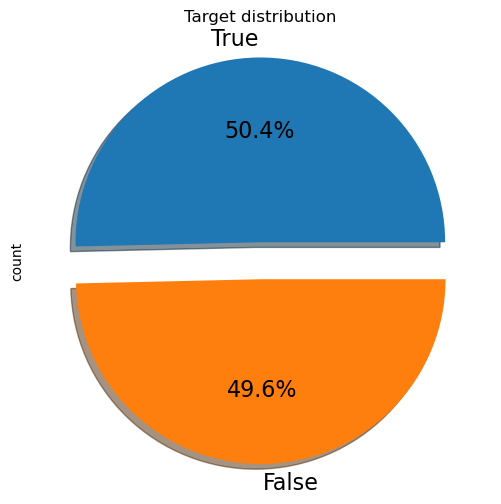

In [139]:
# Figure size
plt.figure(figsize=(6,6));

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution");

The target feature is "Transported" which indicates whether or not a passenger was transported to another dimension. Approximately half of all passengers on board were transported.

### Categorical Feature Analysis

The categorical features will be analysed to determine how the target feature depends on the categorical features.

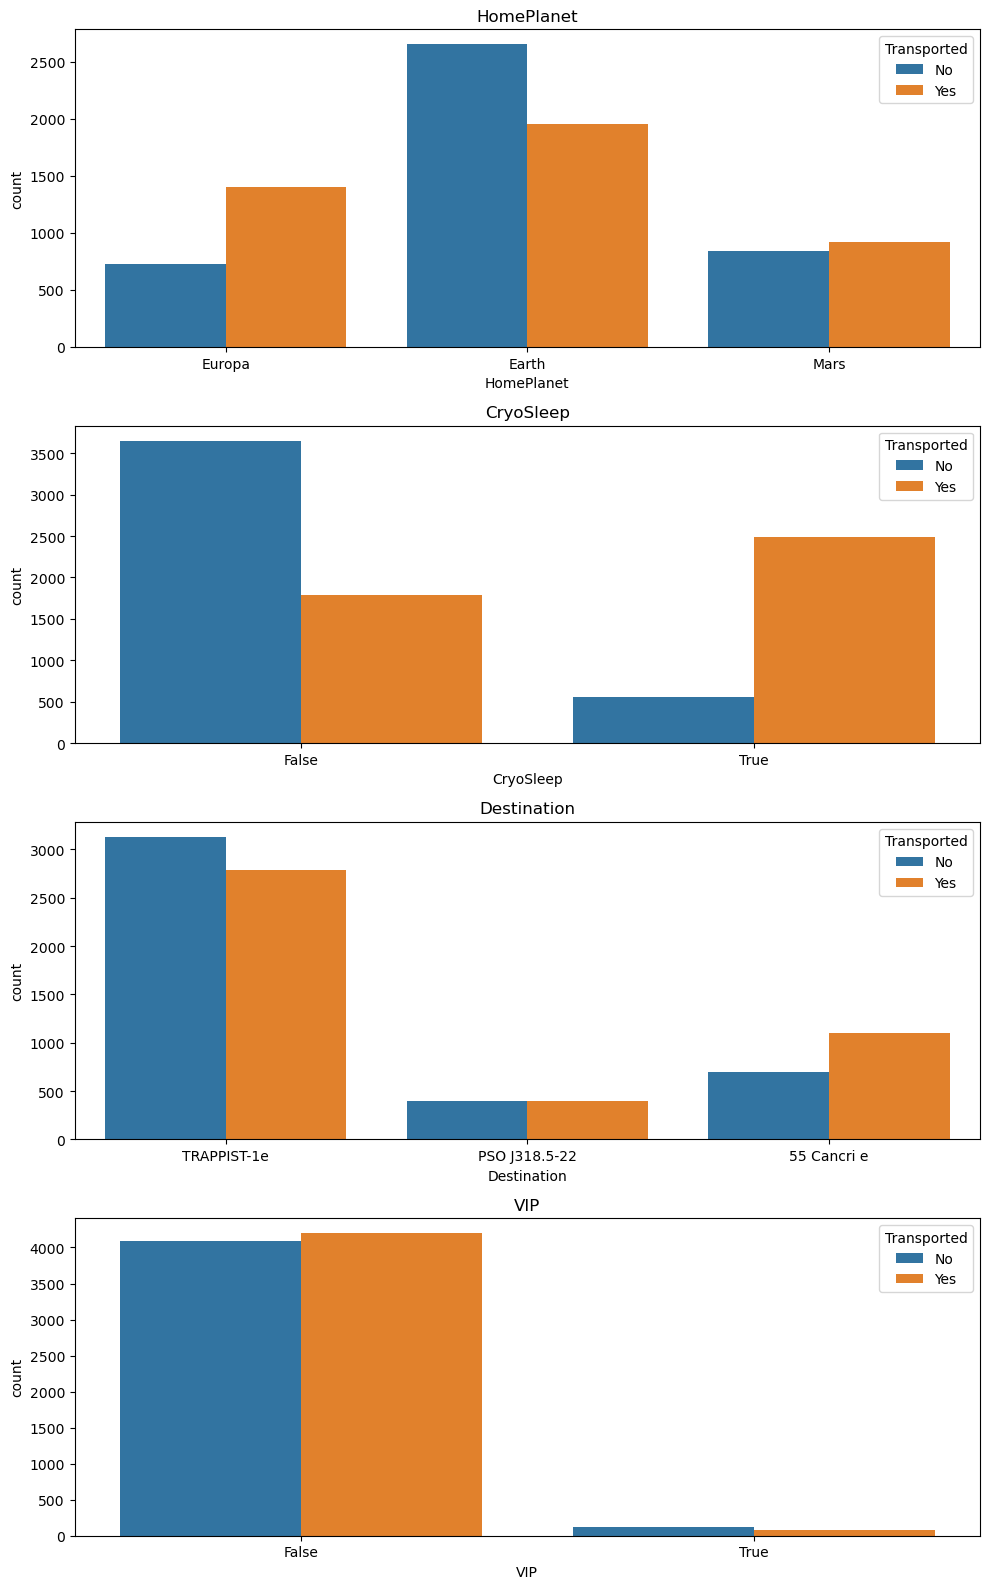

In [140]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Convert boolean values to strings ('Yes' and 'No')
temp_combined_df['Transported'] = combined_df['Transported'].map({True: 'Yes', False: 'No'})

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=temp_combined_df, x=var_name, ax=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The relationship between categorical features and "Transported" are investigated. There  is no direct relationship between "Transported" and "HomePlanet", "Destination", and "VIP". "CryoSleep" appears to have a relationship with "Transported". People that are in CryoSleep have a higher liklihood of being transported compared to people not in CryoSleep [1].

[1]https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA

### Numerical Feature Analysis


The numerical features will be analysed to determine how the target feature depends on the numerical features.

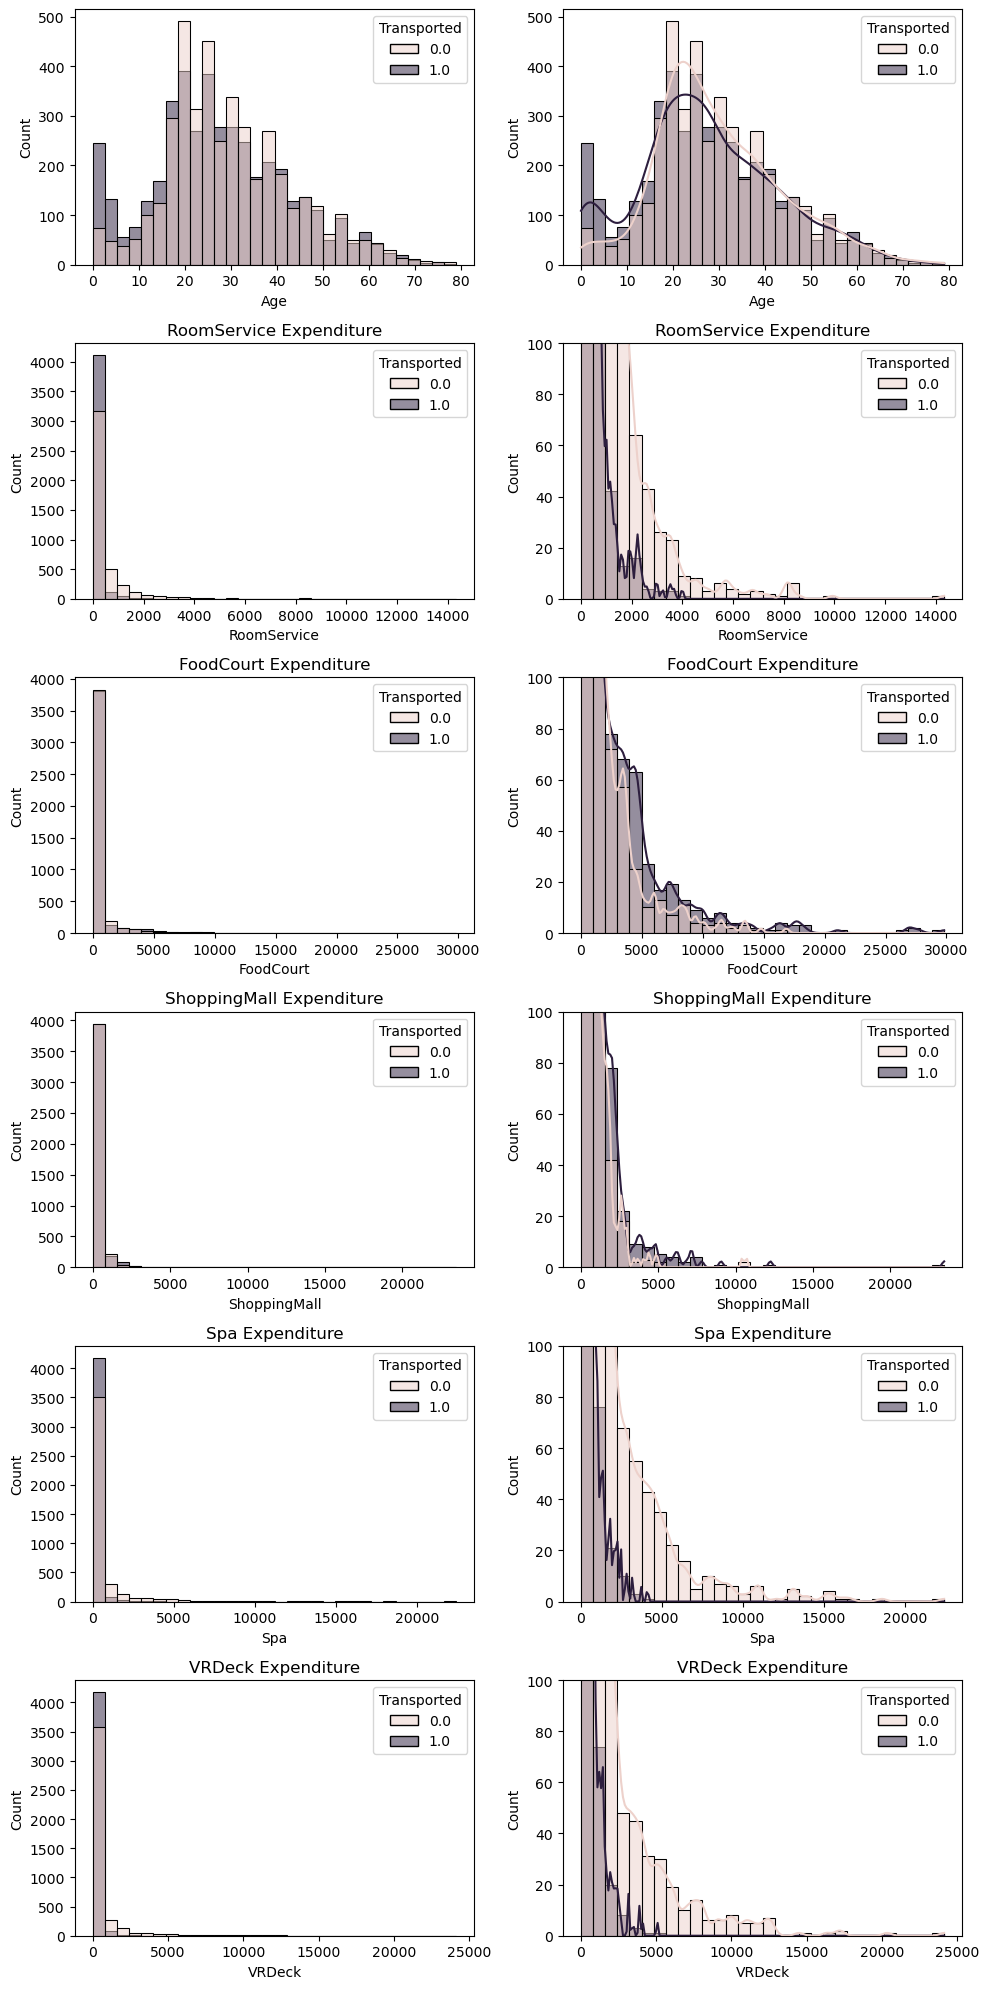

In [141]:
# Numerical features
num_feats=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot numerical features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(num_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    if(i!=0):
        ax.set_title(var_name + " Expenditure")
    
    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    if(i!=0):
        plt.ylim([0,100])
        ax.set_title(var_name + " Expenditure")
fig.tight_layout()  # Improves appearance a bit

plt.show()

Majority of passengers did not spend any money. People that spent less money were more likely to be transported. We can build on the relationship between CryoSleep and Transported as people in CryoSleep would not have spent any money. A simple way to verify this observastion is to form some sort of relationship. To make it easier to analyse, we group all individial expense features into a singular expense feature. 

In [142]:
expense_feature = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
combined_df['TotalExpenditure'] = combined_df.loc[:,expense_feature].sum(axis=1)

temp_combined_df['TotalExpenditure'] = temp_combined_df.loc[:,expense_feature].sum(axis=1)
combined_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


In [143]:
combined_df.groupby('HomePlanet')['VIP'].mean()

HomePlanet
Earth          0.0
Europa    0.057843
Mars      0.034312
Name: VIP, dtype: object

In [144]:
combined_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: object

In [145]:
combined_df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e          0.61
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: object

In [146]:
combined_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: object

In [147]:
combined_df.groupby('VIP')['TotalExpenditure'].mean()

VIP
False    1358.276510
True     4595.542125
Name: TotalExpenditure, dtype: float64

#### Numerical Feature Analysis 



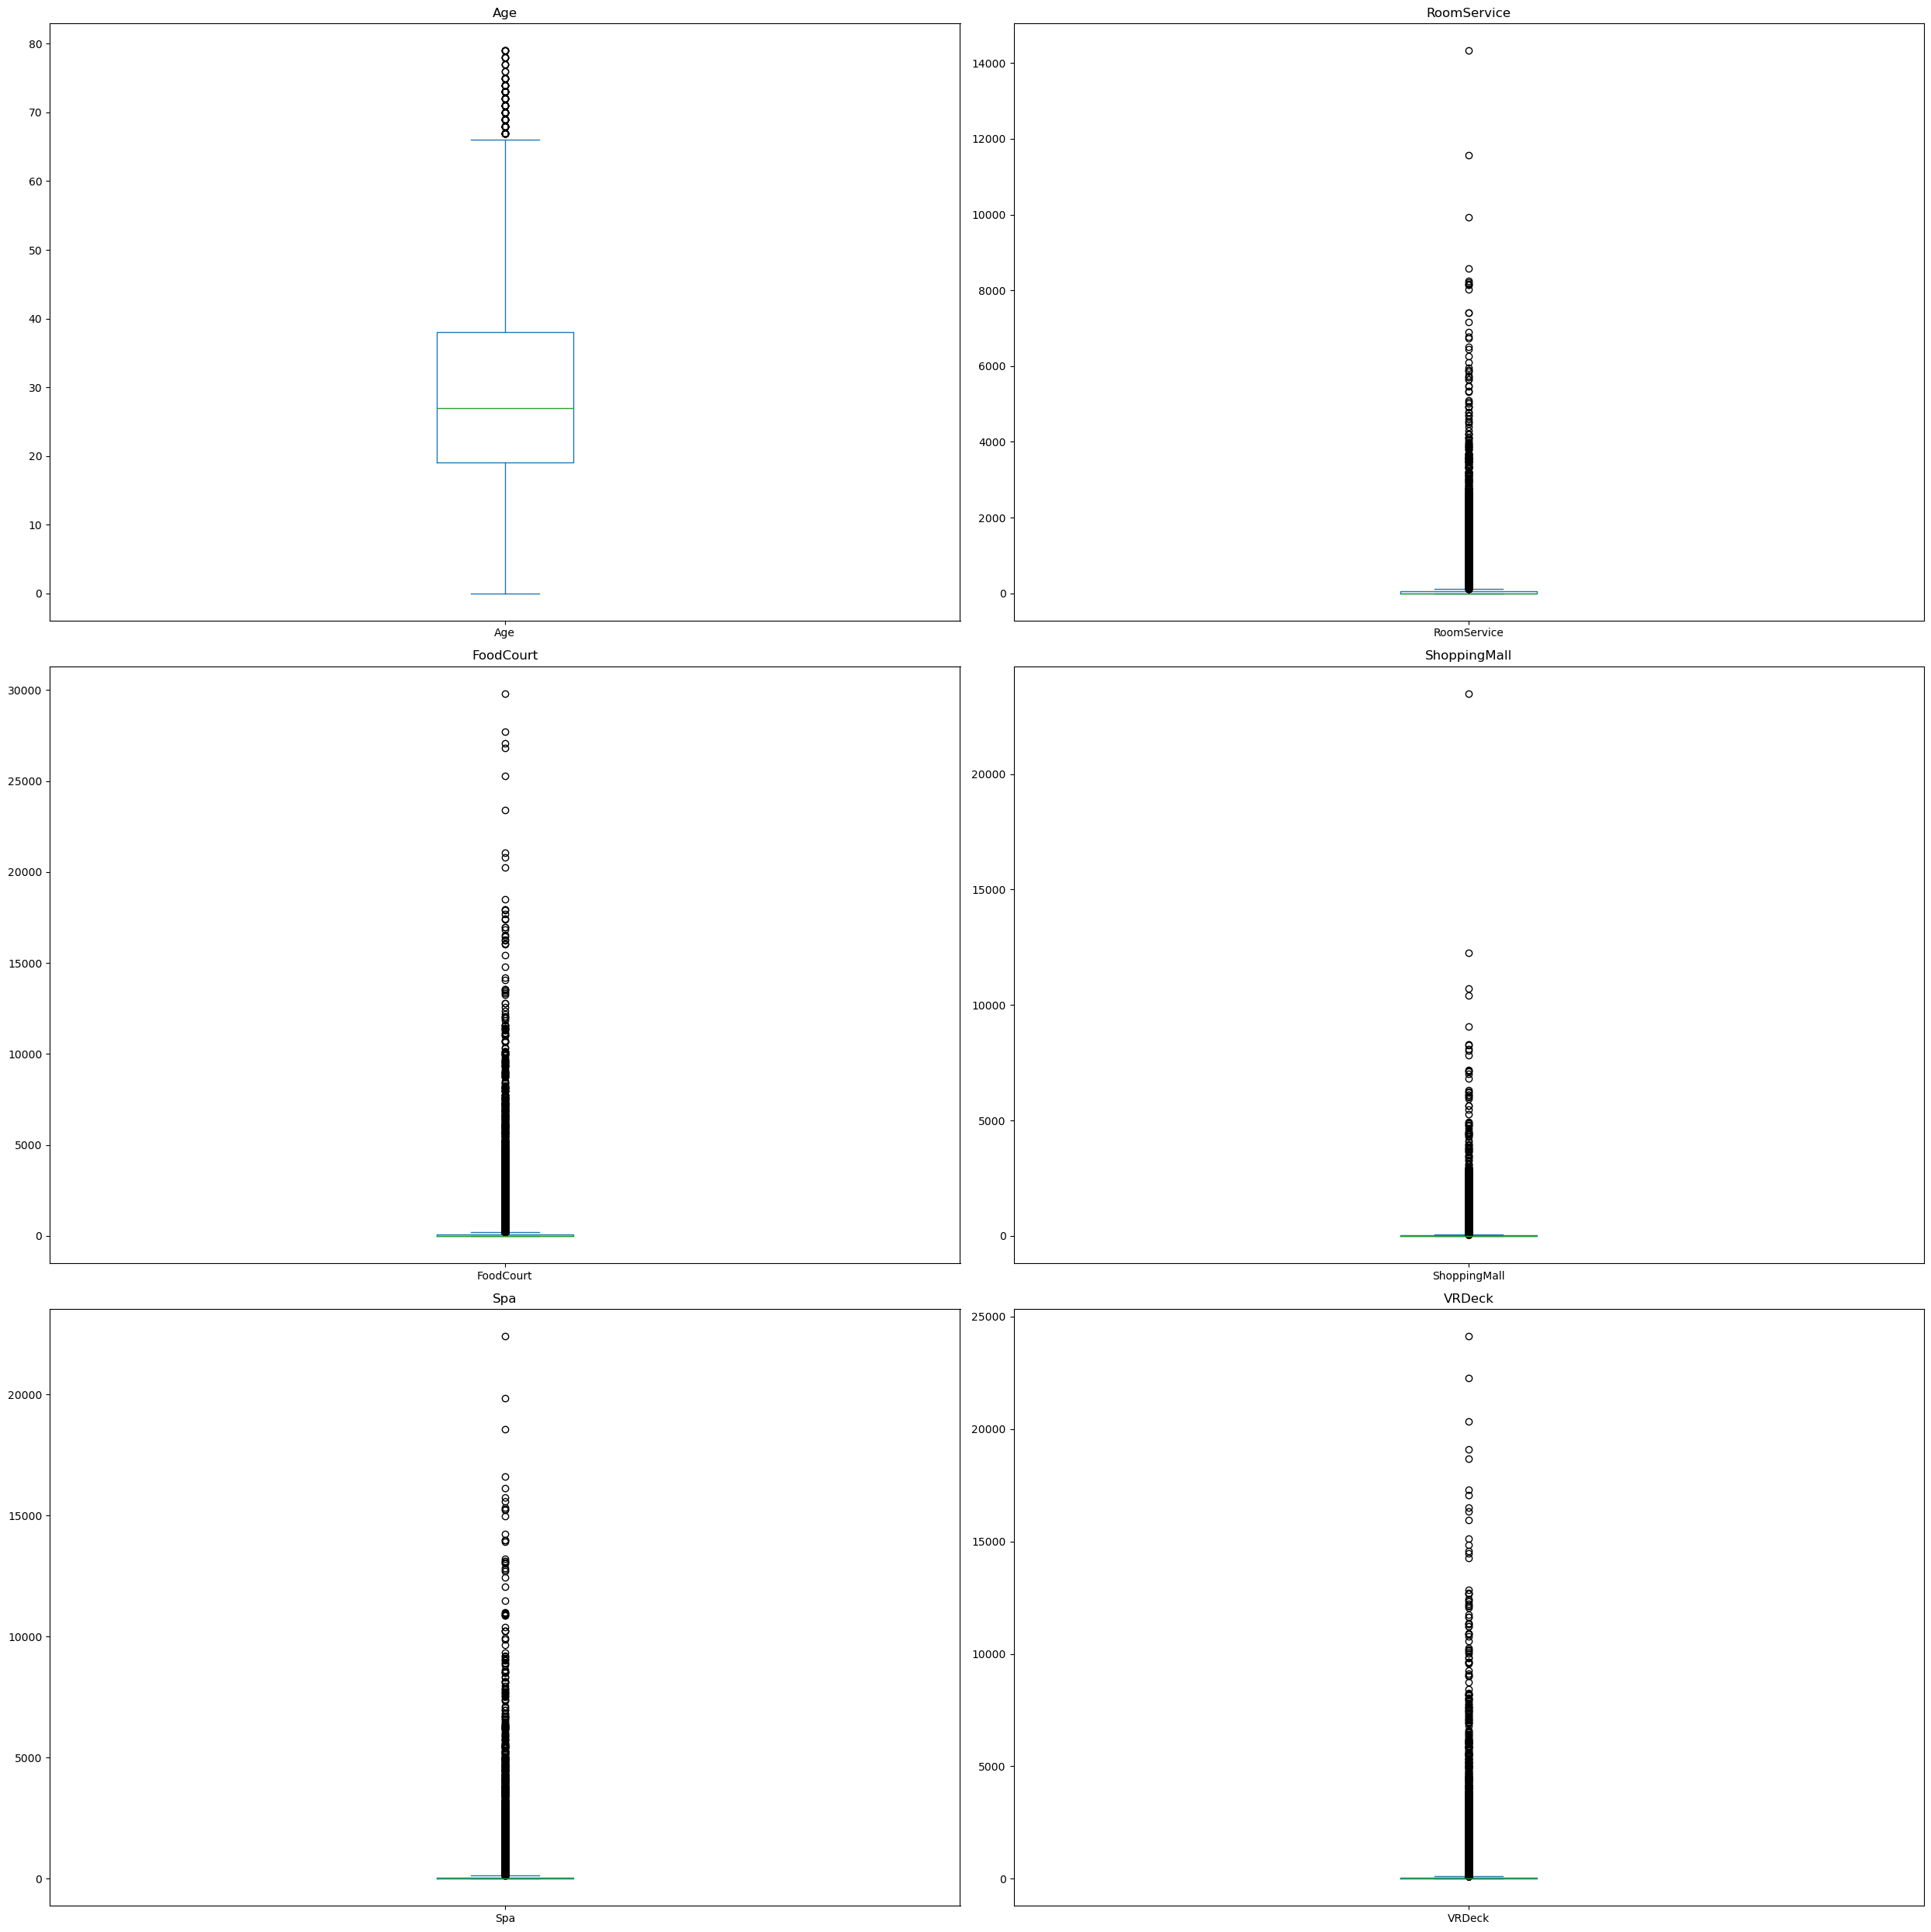

In [148]:
# Display box and wshisker diagrams for each numerical feature
num_variables = len(num_feats)
nrows = num_variables // 2  
ncols = 2  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))

for i, var in enumerate(num_feats):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]  

    combined_df[var].plot(kind='box', ax=ax) 
    ax.set_title(var)


plt.tight_layout()
plt.show()

A key observation made from the box and whisker diagrams of the numerical features is that there are many outliers found in the data, especially in terms features that relate to expenditure

## 3. Feature Engineering

### 3.1 Adjusting Features
#### 3.1.1 Cabins and Passenger IDs


The passengers' ID's and the Cabin location contain multiple forms of information that can be extracted into additional features. The cabin data is listed in the following format: _deck/num/side_. Therefore, we can split the cabin feature into three seperate features. Additionally, PassengerID is listed in the format _gggg _ pp_ , where _gggg_ represents the group number and _pp_ represents a passenger's number within a group. The group numbers are extracted from PassengerID to form an additional feature

In [149]:
combined_df['Group'] = combined_df['PassengerId'].astype(str).str[:4]

counts = combined_df['Group'].value_counts()
combined_df['Group'] = combined_df['Group'].map(counts)

combined_df[['Deck', 'Number', 'Side']] = combined_df['Cabin'].str.split('/', expand=True)

combined_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,F,1,S


#### 3.1.2 Age


From the data analysis done in Section 2, it is seen that the range of the age of passengers is 79 years. This wide range of values in its current numerical form does not provide much meaningful information. However, this can be changed by binning the data into age groups, allowing for trends amongst age groups to be identified more easily. Additionally, having an age group feature will greatly reduce the complexity of models.
Passengers are grouped together in this particular way to identify a relationship between _Age Groups_ and the measured variable (_Transported_) and between _Age Groups_ and _TotalExpenditure_.

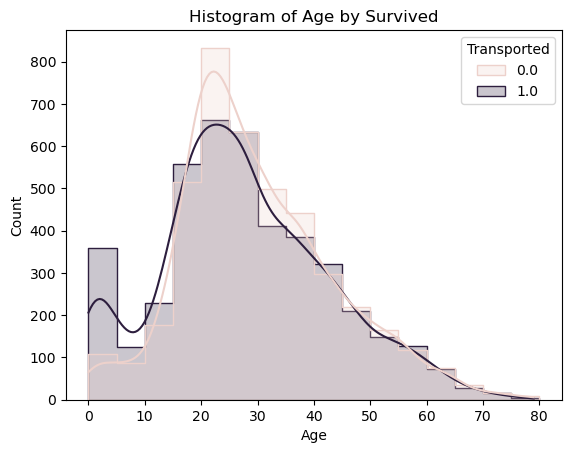

In [150]:
sns.histplot(data=combined_df, x='Age', hue='Transported', element='step', kde=True,binwidth=5)
plt.title('Histogram of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [151]:
combined_df['AgeGroup']=np.nan
combined_df.loc[combined_df['Age']<=12,'AgeGroup']='1'
combined_df.loc[(combined_df['Age']>12) & (combined_df['Age']<18),'AgeGroup']='2'
combined_df.loc[(combined_df['Age']>=18) & (combined_df['Age']<=25),'AgeGroup']='3'
combined_df.loc[(combined_df['Age']>25) & (combined_df['Age']<=30),'AgeGroup']='4'
combined_df.loc[(combined_df['Age']>30) & (combined_df['Age']<=50),'AgeGroup']='5'
combined_df.loc[combined_df['Age']>50,'AgeGroup']='6'

In [152]:
combined_df.groupby('AgeGroup')['Transported'].mean()

AgeGroup
1    0.699752
2    0.553451
3    0.458103
4    0.496272
5    0.479432
6    0.484396
Name: Transported, dtype: object

In [153]:
combined_df.groupby('AgeGroup')['TotalExpenditure'].mean().fillna(0)

AgeGroup
1       0.000000
2     864.158085
3    1109.285911
4    1939.196378
5    1946.321492
6    1941.712022
Name: TotalExpenditure, dtype: float64

From the above relationships there are two key takeaways:
1. Passengers that are from the first _AgeGroup_ (0-12 years old) do not have any expenditure. 
2. Passengers that are from the first _AgeGroup_ (0-12 years old) are the most likely to be transported. 

### 3.2 Filling missing data entries


In [154]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group", "AgeGroup"]
transported=['Transported']
combined_df = combined_df[num_cols+cat_cols+transported].copy()

In [155]:
# Print the count of the total number of  missing data entries exluding the target feature
print("Number of missing data entries:", (combined_df.isna().sum().sum() - combined_df["Transported"].isna().sum().sum()))

Number of missing data entries: 3716


When dealing with missing data entries it is important to consider why data is missing. Are the data entries Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR) [2] ? This is important to consider when deciding on an imputation method to fill the missing data. Having observed the data, it observed that certain data may be MNAR as identified from their relationships whilst the remaining missing values may be MAR.

The relationships that have been identified are :
 * That people that are in _CryoSleep_ do not have any expenditure. 
 * That there are no _VIP_ passenegers from _Earth_. 
 
 Using these facts, any missing expenditure features that are missing for passenegers that are in _CryoSleep_ can be filled with a zero. 
 Additionally, to fill in missing data entries where either the _VIP_ status is known to be _False_ but the _HomePlanet_ is missing or when the _HomePlanet_ is known to be _Earth_ but the _VIP_ status is not known. The remaining missing values in each of these categories are filled in using the Simple Imputer method discused above .  

One way of dealing with the remaining missing values is to simply remove rows or columns of data that are missing entries [2]. However, this is method is not particularly useful in the given context as there are 3716 missing data entries. Deleting entire rows or entire feature columns will have a significant impact on the available data as a large volume of important information is being discarded. Therefore, this is not an ideal approach to dealing with missing data. 

Another way of dealing with the missing data is by using a Simple Imputer to fill missing numerical feature data with its mean and categorical feature data with its mode [2]. This method maintains the total number of entries. However, this can lead to slight inaccuracies and bring about biasing in the data. As observed from the data analyis done in Section 2, there are numerous outliers found in the numerical features. These outliers can skew the data and can result in inaccuracies when filling in missing entries. 

The third approach that is considered is the K-Nearest-Neighbours imputation method. This method imputes a missing data entry with the mean value of the __K__ nearest neighbours. This method imputes missing values more accurately than the Simple Imputer method [3].   

 [2] GfG, “ML Handling Missing Values,” GeeksforGeeks, May 04, 2018. https://www.geeksforgeeks.org/ml-handling-missing-values/ (Accessed Mar. 31, 2024).

 [3] GfG, “Python Imputation using the KNNimputer(),” GeeksforGeeks, Aug. 10, 2020. https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/ (accessed Apr. 02, 2024).
‌
‌

In [156]:
combined_df.isna().sum()

ShoppingMall         306
FoodCourt            289
RoomService          263
Spa                  284
VRDeck               268
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  296
HomePlanet           288
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [157]:
# Function to set expense features to 0 if CryoSleep is True
def adjust_expenses(row):
    if row['CryoSleep'] == True:
        row[expense_feature] = 0
        row['TotalExpenditure'] = 0
    return row

# Apply the function to the DataFrame
combined_df = combined_df.apply(adjust_expenses, axis=1)

# Update the 'CryoSleep' column based on the 'TotalExpenditure' column
combined_df.loc[:,['CryoSleep']]=combined_df.apply(lambda x: True if x.TotalExpenditure == 0 and pd.isna(x.CryoSleep) else x,axis =1)

In [158]:
# Update the 'VIP' column based on the 'HomePlanet' column
combined_df.loc[:,'VIP'] = combined_df.apply(lambda x: False if x.HomePlanet == "Earth" and pd.isna(x.VIP) else x, axis = 1)

# Update the 'HomePlanet' column based on the 'VIP' column
combined_df.loc[:,'HomePlanet'] = combined_df.apply(lambda x: "Earth" if x.VIP == False and pd.isna(x.HomePlanet) else x, axis = 1)

In [159]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            174
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

It can be noticed that by utilising the identified relationships between certain features, numerous missing data entries can be filled with expected values. This corroborates with the previous statement that certain missing values in the data set are MNAR. 

In [160]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [161]:
combined_df[num_cols] = pd.DataFrame(num_imp.fit_transform(combined_df[num_cols]),columns=num_cols)
combined_df[cat_cols] = pd.DataFrame(cat_imp.fit_transform(combined_df[cat_cols]),columns=cat_cols)

In [162]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group","AgeGroup"]
transported=['Transported']
combined_df= combined_df[num_cols+cat_cols+transported].copy()

### 3.3 Scaling Numerical Data

An important aspect of the feature engineering process is to scale features. Feature scaling is a process whereby numerical features from a dataset are standardised to a specific range. This process is advantageous in numerous regards as it [3]:

1. Prevents Feature Dominance: Features with larger ranges have a tendency to dominate the model, resulting in biased results. Feature scaling prevents this from occuring.
2. Improves Algorithm Performance: Many algorithms converge faster when features are scaled. This results in better performance.
3. Enhances Numerical Stability: Reduces the range of varying feature scales, thereby reducing the risk of numerical problems.

Using a StandardScaler is one of the many different ways of scaling features. It achieves this by adjusting the mean and standard deviation of each feature to zero and one, respectively. Additionally, StandardScaler does not alter the overall shape of the data's distribution. This ensures that feature dominance is not prevelant during training process[4].

[3] GfG, “Feature Engineering Scaling, Normalization, and Standardization,” GeeksforGeeks, Jul. 02, 2018. https://www.geeksforgeeks.org/ml-feature-scaling-part-2/ (Accessed Apr. 01, 2024).

[4] GfG, “What is StandardScaler?,” GeeksforGeeks, Feb. 09, 2024. https://www.geeksforgeeks.org/what-is-standardscaler/ (Accessed Apr. 01, 2024).
‌‌

In [163]:
from sklearn.preprocessing import StandardScaler
combined_df[num_cols] = StandardScaler().fit_transform(combined_df[num_cols])
combined_df

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,TotalExpenditure,Age,CryoSleep,Deck,Side,VIP,HomePlanet,Destination,Group,AgeGroup,Transported
0,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,7.184543e-01,False,B,P,False,Europa,TRAPPIST-1e,1,5,False
1,-0.253713,-0.280205,-0.175094,0.217417,-0.223108,-0.248363,-3.352005e-01,False,F,S,False,Earth,TRAPPIST-1e,1,3,True
2,-0.296537,1.995972,-0.278018,5.731930,-0.218828,3.188082,2.053084e+00,False,A,S,True,Europa,TRAPPIST-1e,2,6,False
3,0.338966,0.532761,-0.345075,2.703688,-0.095548,1.333249,2.969924e-01,False,A,S,False,Europa,TRAPPIST-1e,2,5,False
4,-0.037882,-0.241280,0.127442,0.231727,-0.259065,-0.121906,-8.971498e-01,False,F,S,False,Earth,TRAPPIST-1e,1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,3.672360e-01,True,G,S,False,Earth,TRAPPIST-1e,2,5,NaN
12966,-0.267417,0.254540,-0.345075,-0.264633,-0.137497,-0.147910,9.291853e-01,False,F,S,False,Earth,TRAPPIST-1e,1,5,NaN
12967,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,-2.495556e-16,True,D,P,False,Mars,55 Cancri e,1,5,NaN
12968,-0.296537,1.424216,-0.345075,-0.273576,0.186968,0.630429,-2.495556e-16,False,D,P,False,Europa,TRAPPIST-1e,1,5,NaN


#### 3.4 One-Hot Encoding


Machine learning algorithms are only able to perform operations on data that is represented numerically [5]. Categorical features contain valuable information and therefore need to be transformed into a numerical form that machine learning algorithms can utilise. A commonly used technique to convert categorical features into numerical features is One Hot Encoding (OHE). OHE considers a categorical feature and identifies the number of unique variables or types within that feature (which will be referred to as n). This is used to create n new binary features that encapsulates the categorical data in a numerical form. Thus, overcoming the limitations of machine learning algorithms only being able to operate on numerical features.


[5] Potdar, K., Pardawala, T., and Pai, C. “A Comparative Study of Categorical Variable Encoding Techniques for Neural Network Classifiers,” IJCA, vol. 175, no. 4, pp. 7–9, Oct. 2017, doi: 10.5120/ijca2017915495.


In [164]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False)
temp_train = pd.DataFrame(ohe.fit_transform(combined_df[cat_cols]),columns=ohe.get_feature_names_out())
combined_df = combined_df.drop(cat_cols,axis=1)
combined_df = pd.concat([combined_df,temp_train],axis=1)

#### 3.5 Separating Train and Test Data

Now that feature columns have been adjusted, missing data has been filled, and categorical features are encoded, the train and test data can once again be split back into their respective forms.

In [165]:
train_df = combined_df[combined_df['Transported'].notnull()].copy()
train_df.Transported =train_df.Transported.astype('int')
test_df = combined_df[combined_df['Transported'].isnull()].drop("Transported",axis=1)

X = train_df.drop('Transported',axis=1)
y = train_df["Transported"]
print(X)
print(y)

      ShoppingMall  FoodCourt  RoomService       Spa    VRDeck  \
0        -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
1        -0.253713  -0.280205    -0.175094  0.217417 -0.223108   
2        -0.296537   1.995972    -0.278018  5.731930 -0.218828   
3         0.338966   0.532761    -0.345075  2.703688 -0.095548   
4        -0.037882  -0.241280     0.127442  0.231727 -0.259065   
...            ...        ...          ...       ...       ...   
8688     -0.296537   4.065398    -0.345075  1.195827 -0.197425   
8689     -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
8690      2.910098  -0.285948    -0.345075 -0.272682 -0.260777   
8691     -0.296537   0.383441    -0.345075  0.042126  2.508735   
8692     -0.296537   2.705563    -0.148583 -0.273576 -0.250504   

      TotalExpenditure       Age  CryoSleep_False  CryoSleep_True  Deck_A  \
0            -0.510541  0.718454              1.0             0.0     0.0   
1            -0.248363 -0.335201              1.0    

#### 3.6 Identifying Correlated Features    

One aspect of the feature selection process is to identify the correlation between all the variables of the dataset. This is important as highly correlated features can have adverse effects on a model.
High correlations between features can cause the following issues [6]:

1.	Redundancy of Information: Certain features may not provide new information to a model as the information can be inferred from another feature. Therefore, it does not improve the predictive power of a model. Removing redundant can assist in preventing overfitting in models, thus resulting in better performance on unseen data. 
2.	Increased Complexity of Models: If highly correlated features are not removed, the dimensionality of data is increased which can result in longer computational times. 
3.	 Interpretation of Data: Having highly correlated features can complicate the interpretability of feature importance, resulting in a lapse in a model’s decision making.

Therefore, it is imperative to identify correlated features and remove them from the dataset. This is done by  identifying the top ten absolute correlations between different features (disregarding correlations between a feature and itself, as this will always return a maximum correlation of 1.0)

[6] M, Sujatha., “Why we have to remove highly correlated features in Machine Learning?,” Medium, Nov. 29, 2023. https://medium.com/@sujathamudadla1213/why-we-have-to-remove-highly-correlated-features-in-machine-learning-9a8416286f18 (Accessed Apr. 02, 2024).



In [166]:
def get_redundant_pairs(X):
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations !")
print(get_top_abs_correlations(train_df.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations !
CryoSleep_False          CryoSleep_True             1.000000
VIP_False                VIP_True                   1.000000
Side_P                   Side_S                     1.000000
Destination_55 Cancri e  Destination_TRAPPIST-1e    0.783137
FoodCourt                TotalExpenditure           0.743001
HomePlanet_Earth         HomePlanet_Europa          0.633221
Age                      AgeGroup_6                 0.624678
Spa                      TotalExpenditure           0.593307
VRDeck                   TotalExpenditure           0.585552
Deck_G                   HomePlanet_Earth           0.581275
dtype: float64


From the top ten most correlated features, three sets of features (-CryoSleep_False_ and CryoSleep_True, VIP_False and VIP_True, Side_P and Side_S) return a maximum correlation of 1.0 which is indicative of redundant data. Therefore, these features are to be removed from the dataset. Additionally, features such as Destination_TRAPPIST-1e, FoodCourt, Age and HomePlanet_Earth are removed as well due to their high correlations with other features. 
    


In [167]:
drop_list=["Age",'CryoSleep_True','HomePlanet_Earth', 'VIP_False','FoodCourt','Destination_TRAPPIST-1e', "Side_P"]

X=X.drop(drop_list,axis=1)
train_df=test_df.drop(drop_list,axis=1)

X.columns

Index(['ShoppingMall', 'RoomService', 'Spa', 'VRDeck', 'TotalExpenditure',
       'CryoSleep_False', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'VIP_True', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Group_1', 'Group_2', 'Group_3', 'Group_4',
       'Group_5', 'Group_6', 'Group_7', 'Group_8', 'AgeGroup_1', 'AgeGroup_2',
       'AgeGroup_3', 'AgeGroup_4', 'AgeGroup_5', 'AgeGroup_6'],
      dtype='object')

## 4 Models


#### 4.1 Model Performance Estimations


In [168]:
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
     CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cross_validation_results = []
for classifier in classifiers :
    cross_validation_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cross_validation_mean = []
cross_validation_std = []
for cv_result in cross_validation_results:
    cross_validation_mean.append(cv_result.mean())
    cross_validation_std.append(cv_result.std())

cross_validation_res = pd.DataFrame({"CrossValMeans":cross_validation_mean,"CrossValerrors": cross_validation_std,"Algorithm":["SVC", "RandomForest","ExtraTrees","GradientBoosting", "CatBoostClassifier", "XGBClassifier", "LGBMClassifier"]})

In [169]:
cross_validation_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.797658,0.014210,SVC
1,0.790067,0.015284,RandomForest
2,0.768669,0.013804,ExtraTrees
3,0.795932,0.016343,GradientBoosting
4,0.809047,0.014288,CatBoostClassifier
5,0.800536,0.019213,XGBClassifier
6,0.801801,0.017743,LGBMClassifier


#### 4.2 Feature Selection using LBGM Classifier


Classifiers in general are algorithms that organise data as being a part of certain groups or "classes", essentially predicting the class(es) taht a datapoint belongs to[c-d] . The Light Gradient Boosting Classifier (LGBM) is a machine learning algorithm that makes use of decision trees for ranking and classification of data, among other tasks [a]. The classifier makes use of techniques such as Gradient-Based One-Side Sampling (GOSS) and Exclusive feature binding (EFB) among other methods to achieve it's ranking [a-b]. GOSS allows for improved training time and optimized memory usage by retaining instances with large gradients during training [a-b]. EFB allows for a faster training process by combining mutually exclusive features to reduce the number  of dimensions of the data [a].

The LGBM Classifier is used here to determine the 15 most important features of the dataset. This allows for the ranking of features and the removal of unimportant features- leading to improved performance and easier understanding of the underlying processes upon which the model operates [copilot]. Using the LGBM classifier has various advantages:

1. Improves accuracy (when compared to other boosting algorithms) and handles overfitting well in small datasets [e].

2. Training speeds are increased [f].

3. Memory usage is decreased [e].

The training data is further divided into a train and validation set. The train set is used to train the model, allowing for the determination of the best/ most important parameters. The validation set is then used to determine the effectiveness of the model's performance oon unseen data, as will be done in the real world [me and copilot].

The top 15 features are selected and will be used to train the models

    

[a] V. Chugh, “LGBMClassifier: A Getting Started Guide,” KDnuggets, Jul. 29, 2023. https://www.kdnuggets.com/2023/07/lgbmclassifier-gettingstarted-guide.html (accessed Apr. 02, 2024). 

[b] GfG, “LightGBM (Light Gradient Boosting Machine),” GeeksforGeeks, Jul. 15, 2020. https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/ (accessed Apr. 02, 2024).

[c] T. G. Mesevage, “Machine Learning Classifiers - The Algorithms & How They Work,” MonkeyLearn Blog, Dec. 14, 2020. https://monkeylearn.com/blog/what-is-a-classifier/ (accessed Apr. 02, 2024).

[d] S. Asiri, “Classification in Machine Learning: An Introduction | Built In,” builtin.com, Nov. 15, 2022. https://builtin.com/machine-learning/classification-machine-learning (accessed Apr. 02, 2024).

[e] A. Mondal, “LightGBM in Python | Complete guide on how to Use LightGBM in Python,” Analytics Vidhya, Aug. 18, 2021. https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/ (accessed Apr. 02, 2024).

[f] T. Aggarwal, “Empower Your Machine Learning Models with LightGBM: A Step-by-Step Guide,” Medium, Aug. 07, 2023. https://python.plainenglish.io/empower-your-machine-learning-models-with-lightgbm-a-step-by-step-guide-622b3879d34a (accessed Apr. 02, 2024).

In [170]:
%%capture
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
model = LGBMClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="accuracy", n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:15]]  # 15 Most important feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
VRDeck: 0.08411730879815987
RoomService: 0.07815411155836688
Spa: 0.07662449683726283
TotalExpenditure: 0.05658424381828638
CryoSleep_False: 0.03289246693502015
Side_S: 0.015623921794134576
Deck_F: 0.012742955721679144
Deck_C: 0.012288671650373794
Deck_E: 0.010471535365152398
ShoppingMall: 0.008798159861989669
Destination_55 Cancri e: 0.006388729154686612
HomePlane

In [171]:
top_features

Index(['VRDeck', 'RoomService', 'Spa', 'TotalExpenditure', 'CryoSleep_False',
       'Side_S', 'Deck_F', 'Deck_C', 'Deck_E', 'ShoppingMall',
       'Destination_55 Cancri e', 'HomePlanet_Mars', 'Deck_B',
       'HomePlanet_Europa', 'AgeGroup_2'],
      dtype='object')

In [172]:
# Let's move on with the top 15 features
X_FeatureSelection_LGM = X[top_features]
test_FeatureSelection_LGM = test_df[top_features]

#### 4.3 Feature selection using RFE

In [173]:
%%capture
# Create the RFE object and rank each pixel
# Initialize LightGBM classifier
clf = LGBMClassifier()
# Initialize RFE with LightGBM as the estimator
rfe = RFE(estimator=clf, n_features_to_select=15)
rfe.fit(X, y)
column_names = X.columns
selected_column_names = column_names[rfe.support_]
selected_column_names

Recursive Feature Elimination (RFE) is a feature selection algorithm that is used to determine the most important features that contribute to the prediction variable or output of the model [g-h]. While performing a similar task to LGBM Classifier, the method of operation for RFE is different. RFE operates by recursively removing features from the dataset and using the remaining features to create a model whose performance is then evaluated [g-h]. This process is repeated, creating smaller and smaller sets of features until an optimal selection of features is determined [g-h]. RFE also offers similar benefits to LGBM, namely:

1. Improved efficiency through reduced complexity by removing unimportant features [g].

2. Improved accuracy, achieved by focusing on the most relevant features [h].

3. prevents overfitting (by eliminating less important features) [g].

In this implementation, the 15 features which produced the best model were selected.

[g] J. Brownlee, “Recursive Feature Elimination (RFE) for Feature Selection in Python,” Machine Learning Mastery, May 24, 2020. https://machinelearningmastery.com/rfe-feature-selection-in-python/ (accessed Apr. 02, 2024).

[h] avcontentteam, “Recursive Feature Elimination: Working, Advantages & Examples,” Analytics Vidhya, May 17, 2023. https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/ (accessed Apr. 02, 2024).

## 5. Model tuning

Model tuning or commonly know as hyperparameter optimization is the process of finding the optimal combiation of parameters to govern the learning process of a machine learning model. These hyperparameters can significantly impact the performance of the model [69]. Unlike model parameters which are learned during training, hyperparameters are set prior to the training process and are not derived from the data itself [69]. 

Two methods are utilized to explore hyperparameter optimization namely GridSearch and Optuna. Section 5.1 will explore the use of GridSearch and Section 5.2 will explore the use of Optuna. The comparison of the performance of the two hyperparameter optimization methods is done in Section 5.3. 

[69] K. Li, “Model tuning and what is it ?(using python),” Medium, https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a (accessed Apr. 1, 2024). 

### 5.1 Model tuning using GridSearch

GridSearch is a hyperparameter optimization method that is used in machine learning to find the optimal combination of hyperparameters []. It utilizes an exhaustive search through manually specified hyperparameter space. utilizes a cross-validation or another evaluation methods for evaluating the hyperparameters. This method is powerful because it guarantees finding the most optimal solution within the defined grid, although it can be time-consuming for large hyperparameter spaces.

In [174]:
gridSearch_modelsAccuracy = []

#### 5.1.1 Logistic Regression

In [175]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
X_train, X_test, y_train, y_test = train_test_split(X_FeatureSelection_LGM, y, test_size=0.2, random_state=42   )
lr = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_
accuracy = best_lr.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l1'}
Test Accuracy: 0.7832


#### 5.1.2 Random Forest Classifier

In [176]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1 , scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Test Accuracy: 0.7901


The Random Forest Classifier is operates by creating various decision trees, each consisting of a random subset of features from the dataset [i-j]. In order to make a prediction, the results of all trees are aggregated through voting in classification tasks (The mode all the tree's predictions is taken) and averaging for regression tasks [j]. This method exhibits a few key features namely [j]:

1. High predictive accuracy

2. Resistance to overfitting 

3. Ability to handle large datasets

4. Improved speed through parallelization

In the implementation, the Random Forest Classifier was tuned using gridsearch, taking into consideration four different hyperparameters [k]: 

1. number of different trees to be created (_n_estimators_).

2. Maximum depths of the trees (_max_depth_)

3. Minimum number of samples required to split internal node (_min_samples_split_)

4. minimum number of samples required to be at a leaf node (_min_samples_leaf_)

Furthermore, the 5-fold cross validation is used, and _n_jobs_ is set to _-1_ to indicate that all CPUs should be used for computation [k]. The best hyperparameters were found to be _n_estimators_ of 200, _max_depth_ of 20, _min_samples_split_ of 2, and _min_samples_leaf_ of 2

[i] M. Chaudhary, “Random Forest Algorithm - How It Works and Why It Is So Effective,” www.turing.com. https://www.turing.com/kb/random-forest-algorithm (accessed Apr. 02, 2024).

[j] GfG, “Random Forest Algorithm in Machine Learning,” GeeksforGeeks, Feb. 22, 2024. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ (accessed Apr. 02, 2024).

[k] Scikit-learn, “sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation,” Scikit-learn.org, 2018. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (accessed Apr. 02, 2024).

#### 5.1.3 Naive Bayes 

##### 5.1.3.1 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_gnb = grid_search.best_estimator_
predictions = best_gnb.predict(X_test)

accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Naive Bayes Classification methods are bult on probability derived from Baye's Theorem [l]. This family of methods does not rely on determining most important features, but rather seeks to determine the distribution of inputs to a class [l-m]. Naive Bayes Classifiers assume that all features are independent of one another [n]. 

The Gaussian Naive Bayes (GNB) method is a form of Naive Bayes that assumes continuous values associated with features are distributed according to a Gaussian Distribution [n-o]. When in operation, this method calculates the the probability that a certain instance belongs to each class, and the class with the highest probability is chosen as the prediction [o]. This method is cabable of handling both binary and multi-class classification problems and performs wel, especially when the assumption of independence holds [m]. The method is favourable when dealing with large numbers of features, as dimensionality is not an issue.

The only parameter that could be changed was _var_smoothing_ which handles data that does not form part of the Normal Distribution, allowing for samples further from the mean to be accounted for [q]. 100 numbers equally spaced on a log scale from 10^0 until 10^-9 were considered, and the best performaning value was 0.0006579332246575676. 5-fold cross validation was used as before.

[l] N. Kumar, “Naive Bayes Classifiers - GeeksforGeeks,” GeeksforGeeks, Jan. 14, 2019. https://www.geeksforgeeks.org/naive-bayes-classifiers/ (accessed Apr. 02, 2024).

[m] IBM, “What Are Naïve Bayes Classifiers? | IBM,” www.ibm.com. https://www.ibm.com/topics/naive-bayes#:~:text=Na%C3%AFve%20Bayes%20is%20part%20of (accessed Apr. 02, 2024).

[n] C. Martins, “Gaussian Naive Bayes Explained With Scikit-Learn | Built In,” builtin.com, Nov. 02, 2023. https://builtin.com/artificial-intelligence/gaussian-naive-bayes (accessed Apr. 02, 2024).

[o] GfG, “Gaussian Naive Bayes,” GeeksforGeeks, Nov. 13, 2023. https://www.geeksforgeeks.org/gaussian-naive-bayes/ (accessed Apr. 02, 2024).

[p] Scikit-learn, “sklearn.naive_bayes.GaussianNB — scikit-learn 0.22.1 documentation,” scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (accessed Apr. 02, 2024).

[q] K. Jain, “How to Improve Naive Bayes?,” Analytics Vidhya, Apr. 03, 2021. https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba (accessed Apr. 02, 2024).

##### 5.1.3.2 Bernoulli Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Additive (Laplace/Lidstone) smoothing parameter
    'binarize': [0.0, 0.5, 1.0],             # Threshold for binarizing of sample features
    'fit_prior': [True, False]               # Whether to learn class prior probabilities or not
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_bnb = grid_search.best_estimator_
predictions = best_bnb.predict(X_test)

# Calculate the accuracy
accuracy = best_bnb.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

The Bernoulli Naive Bayes (BNB) method follows similar operation to the Gaussian Naive Bayes method. It is assumed taht all features are binary and makes predictions based on the Bernoulli Distribution. All other assumptions and methods of the GNB method still hold for BNB [r-s].

Various hyperparameters were considered:

1. Additive smoothing (_alpha_)

2. The threshold for mapping features to booleans (_binarize_)

3. Whether or not to consider prior probabilities of teh class or not (_fit_prior_)

The best parameters were found to be _alpha_ of 0.01, _binarize_ of 0.0, and _fit_prior_ set to true. This was determined using 5-fold cross validationa. It may be noted that the test accuracy of the BNB method is better than that of the GNB method.


[r] GfG, “Bernoulli Naive Bayes,” GeeksforGeeks, Oct. 25, 2023. https://www.geeksforgeeks.org/bernoulli-naive-bayes/ (accessed Apr. 02, 2024).

[s] N. Mutha, “Bernoulli Naive Bayes,” OpenGenus IQ: Learn Computer Science, May 30, 2020. https://iq.opengenus.org/bernoulli-naive-bayes/ (accessed Apr. 02, 2024).

#### 5.1.4 XGBClassifier

In [177]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_XG = grid_search.best_estimator_
accuracy = best_XG.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.7878


#### 5.1.5 CatBoostClassifier

In [178]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.05]
}
catboost_classifier = CatBoostClassifier()
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_catboost = grid_search.best_estimator_
accuracy = best_catboost.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

0:	learn: 0.6489334	total: 146ms	remaining: 43.8s
1:	learn: 0.6159472	total: 148ms	remaining: 22.1s
2:	learn: 0.5895242	total: 150ms	remaining: 14.9s
3:	learn: 0.5678078	total: 152ms	remaining: 11.3s
4:	learn: 0.5512434	total: 154ms	remaining: 9.09s
5:	learn: 0.5348665	total: 156ms	remaining: 7.63s
6:	learn: 0.5231323	total: 157ms	remaining: 6.58s
7:	learn: 0.5138880	total: 159ms	remaining: 5.8s
8:	learn: 0.5040380	total: 160ms	remaining: 5.19s
9:	learn: 0.4977162	total: 162ms	remaining: 4.7s
10:	learn: 0.4920265	total: 164ms	remaining: 4.3s
11:	learn: 0.4857810	total: 165ms	remaining: 3.96s
12:	learn: 0.4805805	total: 167ms	remaining: 3.68s
13:	learn: 0.4753188	total: 169ms	remaining: 3.44s
14:	learn: 0.4720833	total: 170ms	remaining: 3.24s
15:	learn: 0.4695339	total: 172ms	remaining: 3.06s
16:	learn: 0.4644889	total: 174ms	remaining: 2.9s
17:	learn: 0.4608214	total: 176ms	remaining: 2.75s
18:	learn: 0.4576063	total: 178ms	remaining: 2.63s
19:	learn: 0.4535300	total: 180ms	remaining: 

#### 5.1.6 Justifying using 15 parameters

In [ ]:
%%capture
num_col = X_train.columns.shape[0];
feature_accuracy_scores = [];
for i in range(1,num_col+1):
    top_features = X.columns[sorted_indices[:i]];  # 15 Most important feature
    top_importances = result.importances_mean[sorted_indices[:i]];
    model = LGBMClassifier();
    scores = cross_val_score(model, X[top_features], y, cv=10, scoring='accuracy');
    feature_accuracy_scores.append(scores.mean());

#Plotting the graph
plt.plot(range(1, num_col+1), feature_accuracy_scores, marker='o')
plt.title('Feature Accuracy Scores vs Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

Evaluating the accuracy scores of various different numbers of features reveals that going beyond 11 columns does not make a significant difference to accuracy, and may actually decrese accuracy in some cases. Thus 15 was chosen as a useful number of columns as accuracy is still maintained, and a good portion of the data is still used by the model.

### 5.2 Model tuning using Optuna

Optuna is an open-source hyperparameter optimization framework that can be utilizied in Python [70]. It allows for the process of finding the best hyperparamters to be automated [70]. This framework can be utilized for various number of machine learning and deep learning frameworks [70]. Optuna does not utilize GridSearch or Random Search methods and is more computationally efficient than the two methods [71][72]. This is due to the framework prioritizing promising regions of the hyperparameter space and has a faster convergence to the best hyperparameters [72]. 

Certain key aspects of Optuna is outlined below [70]: 

1. It utilizes algorithms like Bayesian optimization with the Tree-structure Parzen Estimator (TPE) and Hyperband to efficiently search through a larger number of hyperparameters. 

2. The utilization of a pruning stategie provides faster results as a trial is terminated if there is a low likely hood of it yielding good results early in it process. 

3. The flexibility of Optuna allows for custom search spaces to be defined 

4. Optuna includes visualizing features to better understand the performance of different hyperparameters. 

5. Control over the performance methods 

\[70] Nik, “Python optuna: A guide to hyperparameter optimization • datagy,” datagy, https://datagy.io/python-optuna/ (accessed Apr. 1, 2024). \
\[71] A. Shahrour, “Optuna vs GridSearch,” Medium, https://medium.com/@abdalrahman_shahrour/optuna-vs-gridsearch-57227556c450 (accessed Apr. 1, 2024). \
\[72] B. Bald&eacute;, “Bayesian sorcery for hyperparameter optimization using optuna,” Medium, https://medium.com/@becaye-balde/bayesian-sorcery-for-hyperparameter-optimization-using-optuna-1ee4517e89a (accessed Apr. 1, 2024). 

In [179]:
optuna_modelsAccuracy = []

#### 5.2.1 Logistic Regression

In [180]:
#define objective function for hyperparameter optimization using optuna
def objective_LogisticRegression(trial):

  #define hyperparameters to optimize for
  params = {
    "C" : trial.suggest_loguniform('C', 1e-3, 1e3),
    "tol" : trial.suggest_uniform('tol', 1e-6, 1e-3)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = LogisticRegression(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_LogisticRegression, n_trials=10)

[I 2024-04-02 23:58:15,719] A new study created in memory with name: no-name-6bebd8a6-df3c-4b07-9f96-7972b0d8cf1b
[I 2024-04-02 23:58:15,815] Trial 0 finished with value: 0.7882208800872953 and parameters: {'C': 605.5971089134143, 'tol': 0.00017483890836629692}. Best is trial 0 with value: 0.7882208800872953.
[I 2024-04-02 23:58:15,884] Trial 1 finished with value: 0.7814343785795443 and parameters: {'C': 0.025503019386893935, 'tol': 0.0001557882910966486}. Best is trial 0 with value: 0.7882208800872953.
[I 2024-04-02 23:58:15,953] Trial 2 finished with value: 0.7852299279177813 and parameters: {'C': 0.1433186148200916, 'tol': 0.00032835280125580456}. Best is trial 0 with value: 0.7882208800872953.
[I 2024-04-02 23:58:16,033] Trial 3 finished with value: 0.7882208800872953 and parameters: {'C': 671.2696459260782, 'tol': 0.0009043401737824953}. Best is trial 0 with value: 0.7882208800872953.
[I 2024-04-02 23:58:16,071] Trial 4 finished with value: 0.7794804230570458 and parameters: {'C'

In [181]:
#get best hyperparameters
best_params_logitsticRegression = study.best_params
print(f'Best hyperparameters: {best_params_logitsticRegression}')

Best hyperparameters: {'C': 605.5971089134143, 'tol': 0.00017483890836629692}


In [182]:
#create XGBClassifier model with best hyperparameters
model_logisticRegression = LogisticRegression(**best_params_logitsticRegression, random_state=0)
#fit and predict using model
model_logisticRegression.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_logisticRegression.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_logisticRegression, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7902965490787403

#### 5.2.2 Random Forest Classifier

In [183]:
#define objective function for hyperparameter optimization using optuna
def objective_RandomForest(trial):

  #define hyperparameters to optimize for
  params = {
    "n_estimators" : trial.suggest_int('n_estimators', 50, 1000),
    "max_depth" : trial.suggest_int('max_depth', 10, 100),
    "min_samples_split" : trial.suggest_int('min_samples_split', 2, 20)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = RandomForestClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_RandomForest, n_trials=10)

[I 2024-04-02 23:58:25,885] Trial 10 finished with value: 0.7945495969735129 and parameters: {'n_estimators': 539, 'max_depth': 82, 'min_samples_split': 20}. Best is trial 10 with value: 0.7945495969735129.
[I 2024-04-02 23:58:35,335] Trial 11 finished with value: 0.7944345221748937 and parameters: {'n_estimators': 543, 'max_depth': 85, 'min_samples_split': 20}. Best is trial 10 with value: 0.7945495969735129.
[I 2024-04-02 23:58:44,437] Trial 12 finished with value: 0.7948945566774815 and parameters: {'n_estimators': 526, 'max_depth': 86, 'min_samples_split': 20}. Best is trial 12 with value: 0.7948945566774815.
[I 2024-04-02 23:58:53,530] Trial 13 finished with value: 0.7953547235260136 and parameters: {'n_estimators': 514, 'max_depth': 86, 'min_samples_split': 20}. Best is trial 13 with value: 0.7953547235260136.
[I 2024-04-02 23:58:58,053] Trial 14 finished with value: 0.7944347206938104 and parameters: {'n_estimators': 247, 'max_depth': 98, 'min_samples_split': 12}. Best is trial 

In [184]:
#get best hyperparameters
best_params_randomforest = study.best_params
print(f'Best hyperparameters: {best_params_randomforest}')

Best hyperparameters: {'n_estimators': 722, 'max_depth': 12, 'min_samples_split': 17}


In [185]:
#create XGBClassifier model with best hyperparameters
model_RandomForestClassifier = RandomForestClassifier(**best_params_randomforest, random_state=0)
#fit and predict using model
model_RandomForestClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_RandomForestClassifier.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_RandomForestClassifier, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7980035183789003

#### 5.2.3 Naive Bayes

#### 5.2.4 XGBClassifier

In [186]:

#define objective function for hyperparameter optimization using optuna
def objective_XGBoost(trial):

  #define hyperparameters to optimize for
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 10, 100),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'subsample': trial.suggest_uniform('subsample', 0.1, 1),
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
      #'gamma': trial.suggest_uniform('gamma', 0, 1),
      'alpha': trial.suggest_loguniform('alpha', 2, 5),
      'lambda': trial.suggest_loguniform('lambda', 2, 5),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = XGBClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_XGBoost, n_trials=5)

[I 2024-04-03 00:00:29,855] Trial 20 finished with value: 0.7699315308256864 and parameters: {'n_estimators': 791, 'max_depth': 17, 'learning_rate': 0.04123412061245936, 'subsample': 0.17179003313674918, 'colsample_bytree': 0.7315613227733772, 'alpha': 4.479134860255085, 'lambda': 3.6560778205363285, 'min_child_weight': 49}. Best is trial 17 with value: 0.7968502326972566.
[I 2024-04-03 00:00:31,231] Trial 21 finished with value: 0.7642951817473767 and parameters: {'n_estimators': 710, 'max_depth': 31, 'learning_rate': 0.44781005360000176, 'subsample': 0.9272381115909529, 'colsample_bytree': 0.9641399482507675, 'alpha': 2.0798259012058082, 'lambda': 2.1053071697349472, 'min_child_weight': 293}. Best is trial 17 with value: 0.7968502326972566.
[I 2024-04-03 00:00:32,576] Trial 22 finished with value: 0.7418646617138404 and parameters: {'n_estimators': 692, 'max_depth': 57, 'learning_rate': 0.008638048896930763, 'subsample': 0.49704278904479315, 'colsample_bytree': 0.522575634703293, 'al

In [187]:
#get best hyperparameters
best_params_xgbClassifer = study.best_params
print(f'Best hyperparameters: {best_params_xgbClassifer}')

Best hyperparameters: {'n_estimators': 997, 'max_depth': 24, 'learning_rate': 0.6706643728105222, 'subsample': 0.894765367582183, 'colsample_bytree': 0.9991941706839634, 'alpha': 4.928193786401498, 'lambda': 2.2628125334748357, 'min_child_weight': 13}


In [188]:
#create XGBClassifier model with best hyperparameters
model_XGBClassifier = XGBClassifier(**best_params_xgbClassifer, random_state=0)
#fit and predict using model
model_XGBClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_XGBClassifier.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_XGBClassifier, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.797545467772443

#### 5.2.5 CatBoostClassifier 

In [189]:
def objective_CatboostClassfier(trial): 
#define hyperparameters to optimize for
  params = {
      'iterations': trial.suggest_int('iterations', 100, 1000),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'depth': trial.suggest_int('depth', 3, 10),
      'loss_function': 'MultiClass'
  }

  #create XGBClassifier model with optimized hyperparameters
  model = CatBoostClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

In [190]:
%%capture

study.optimize(objective_CatboostClassfier, n_trials=10)
print(f'Best hyperparameters: {study.best_params}')

[I 2024-04-03 00:00:49,220] Trial 25 finished with value: 0.7992662079115083 and parameters: {'iterations': 937, 'learning_rate': 0.7839009826106839, 'depth': 3}. Best is trial 25 with value: 0.7992662079115083.
[I 2024-04-03 00:00:54,281] Trial 26 finished with value: 0.8047881439209206 and parameters: {'iterations': 995, 'learning_rate': 0.25724367211011145, 'depth': 3}. Best is trial 26 with value: 0.8047881439209206.
[I 2024-04-03 00:00:59,354] Trial 27 finished with value: 0.8035225858279993 and parameters: {'iterations': 984, 'learning_rate': 0.3125971349162759, 'depth': 3}. Best is trial 26 with value: 0.8047881439209206.
[I 2024-04-03 00:01:04,379] Trial 28 finished with value: 0.805592873435588 and parameters: {'iterations': 978, 'learning_rate': 0.20212369545242892, 'depth': 3}. Best is trial 28 with value: 0.805592873435588.
[I 2024-04-03 00:01:09,255] Trial 29 finished with value: 0.805592079359922 and parameters: {'iterations': 959, 'learning_rate': 0.09304587473316274, 'd

In [191]:
best_params_catboost = study.best_params
print("Best Hyperparameters:", best_params_catboost)

Best Hyperparameters: {'iterations': 207, 'learning_rate': 0.13823132344419878, 'depth': 6}


In [192]:
model_CatBoostClassifier = CatBoostClassifier(**best_params_catboost, random_state=0)
model_CatBoostClassifier.fit(X_FeatureSelection_LGM,y)
score = cross_val_score(model_CatBoostClassifier, X_FeatureSelection_LGM, y, cv=5).mean()
optuna_modelsAccuracy.append(score.mean())
score.mean()

0:	learn: 0.6274325	total: 2.27ms	remaining: 467ms
1:	learn: 0.5866448	total: 4.69ms	remaining: 480ms
2:	learn: 0.5517879	total: 6.7ms	remaining: 456ms
3:	learn: 0.5276799	total: 8.78ms	remaining: 445ms
4:	learn: 0.5104492	total: 11.5ms	remaining: 464ms
5:	learn: 0.4953299	total: 13.8ms	remaining: 462ms
6:	learn: 0.4820794	total: 16.1ms	remaining: 459ms
7:	learn: 0.4734713	total: 18.5ms	remaining: 460ms
8:	learn: 0.4652876	total: 20.7ms	remaining: 456ms
9:	learn: 0.4579151	total: 23ms	remaining: 452ms
10:	learn: 0.4524375	total: 25.2ms	remaining: 448ms
11:	learn: 0.4473826	total: 27.3ms	remaining: 444ms
12:	learn: 0.4427542	total: 29.6ms	remaining: 441ms
13:	learn: 0.4401428	total: 31.9ms	remaining: 439ms
14:	learn: 0.4363114	total: 34.2ms	remaining: 438ms
15:	learn: 0.4329368	total: 36.7ms	remaining: 438ms
16:	learn: 0.4306319	total: 38.9ms	remaining: 435ms
17:	learn: 0.4277961	total: 41.4ms	remaining: 434ms
18:	learn: 0.4254937	total: 43.8ms	remaining: 433ms
19:	learn: 0.4236531	tota

0.8061677842178785

### 5.3 Comparison of GridSearch and Optuna 

In [193]:
def tabulate_vectors(vector1, vector2, vector3):
    # Determine the maximum width for the model names
    max_width = max(len(name) for name in vector1) + 2  # Add some padding

    # Print the header with fixed spacing
    print(f"{'Model'.ljust(max_width)}\t{'GridSearch Accuracy'.ljust(20)}\t{'Optuna Accuracy'.ljust(20)}")

    # Print each row of the combined vectors with fixed spacing
    for row in zip(vector1, vector2, vector3):
        print(f"{row[0].ljust(max_width)}\t{str(row[1]).ljust(20)}\t{str(row[2]).ljust(20)}")


print(gridSearch_modelsAccuracy)
print(optuna_modelsAccuracy)
tabulate_vectors(["Logistic Regression", "Random Forest", "XGBoost", "CatBoost"], gridSearch_modelsAccuracy, optuna_modelsAccuracy)

[0.7832087406555491, 0.7901092581943646, 0.7878090856814262, 0.7941345600920069]
[0.7902965490787403, 0.7980035183789003, 0.797545467772443, 0.8061677842178785]
Model                	GridSearch Accuracy 	Optuna Accuracy     
Logistic Regression  	0.7832087406555491  	0.7902965490787403  
Random Forest        	0.7901092581943646  	0.7980035183789003  
XGBoost              	0.7878090856814262  	0.797545467772443   
CatBoost             	0.7941345600920069  	0.8061677842178785  


The comparison of the Optuna and GridSearch hyperparameter optimization algorithms shows that Optuna does converge to better hyperparameters as the accuracy obtained from these models are slighty better performing compared to the models produced by the GridSearch algorithm. Therefore, the use of the Optuna algoritm will be utilized as a better hyperparameters can be achieved with less trials and less computational power. 